# SAHDAD JOVITO 
# 4212101031
# MEKATRONIKA 5A PAGI

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from sklearn import svm
from mlxtend.data import loadlocal_mnist
import numpy as np 

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score, accuracy_score

# memuat dataset gambar

In [3]:
train_images, train_labels = loadlocal_mnist(images_path='images/mnist-dataset/train-images-idx3-ubyte',
                                             labels_path='images/mnist-dataset/train-labels-idx1-ubyte')

test_images, test_labels   = loadlocal_mnist(images_path='images/mnist-dataset/t10k-images-idx3-ubyte',
                                             labels_path='images/mnist-dataset/t10k-labels-idx1-ubyte')

label gambar =  7


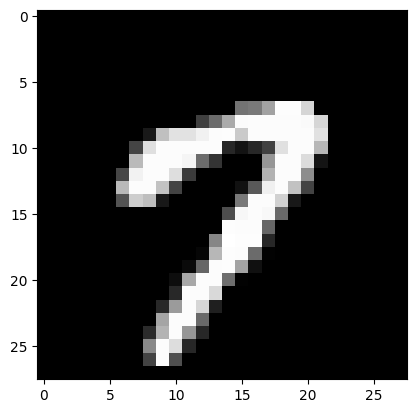

In [4]:
image = 15 #index gambar

# plt.imshow(train_images[image].reshape(28,28), cmap='gray')
# print ('label gambar = ', train_labels[image])

## 1. Preprocessing menggunakan fitur HOG Extraction

In [5]:
feature, _ = hog(train_images[image].reshape(28,28), orientations=9, 
                pixels_per_cell=(8, 8), cells_per_block=(2,2), 
                visualize=True, block_norm='L2')

In [6]:
n_dims = feature.shape[0]
n_samples = train_images.shape[0]
x_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

**Dapatkan fitur HOG dari setiap gambar & masukkan ke dalam variabel dataset**

In [7]:
for i in range(n_samples):
    x_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, 
                        pixels_per_cell=(8, 8), cells_per_block=(2,2), 
                        visualize=True, block_norm='L2')

y_train = np.array(train_labels)

## 2. klasifikasi menggunakan Support Vector Machines

In [18]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

## 3. pengujian prediksi dataset

In [10]:
n_samples = test_images.shape[0]
x_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [11]:
for i in range(n_samples):
    x_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, 
                       pixels_per_cell=(8, 8), cells_per_block=(2,2), 
                       visualize=True, block_norm='L2')

In [19]:

y_pred = clf.predict(x_test)
y_test = np.array(test_labels)

## 4. menampilkan hasil prediksi ##

hasil :  7


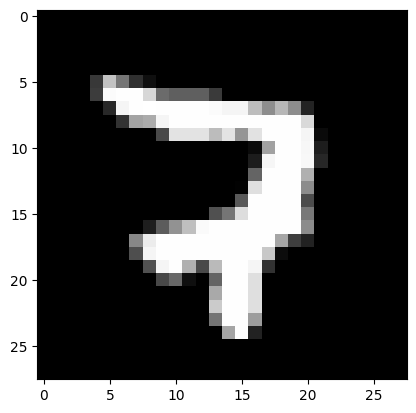

In [26]:
image = 133 #index gambar 

plt.imshow(test_images[image].reshape(28,28), cmap='gray')
out = clf.predict(x_test[image].reshape(1, n_dims))
print('hasil : ',out[0])

## 5. Statistik training menggunakan SVM ##

### 5.1 Confussion Matrix

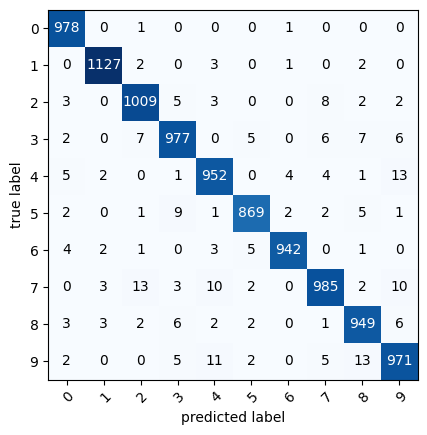

In [14]:
conf_mat = confusion_matrix(y_test, y_pred)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

### 5.2 Precission

In [15]:
precision = precision_score(y_test, y_pred, average=None)
precision

array([0.97897898, 0.99120493, 0.97393822, 0.97117296, 0.96649746,
       0.9819209 , 0.99157895, 0.97428289, 0.96639511, 0.96233895])

### 5.3 Accuracy 

In [16]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9759